### Computational Methods (16:540:540) - Spring 2021
#### Homework 6 – Python Coding

1. Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

2. Assign the output $y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

3. Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn:

        a) Support vector regression

        b) Decision Tree

        c) Artificial Neural Network

Report the MSE and R-squared error. Use 70% of the dataset for training and 30% for testing.

In [1]:
# 1.Generate 100 random samples from multivariate normal distribution where 𝑝 = 5. Then, calculate means and covariance matrix.

In [2]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
rng = default_rng(5)
p, n=5, 100

In [3]:
# multivariate normal distribution
mu = np.random.uniform(-10,10,size=p)
C = np.random.random((p,p))
cov = C @ C.T # positive semi-definite
x_1 = rng.multivariate_normal(mu, cov, n)

In [4]:
x1_mean = np.mean(x_1)
x1_var = np.var(x_1)

In [5]:
print(f'From univariate normal distribution,the mean of 100 random the samples is {round(x1_mean,4)},the variance is {round(x1_var,4)}')

From univariate normal distribution,the mean of 100 random the samples is -1.8164,the variance is 53.3559


In [6]:
# 2. Assign the output:

$y=5 x_{1}+9 x_{2}+2 x_{3}^{2}$

In [7]:
rng = default_rng(5)
y = 5 * x_1[:,0]+ 9*x_1[:,1] + (2 * x_1[:,2])**2 + rng.normal(0,1,n)

In [8]:
# 3.Perform Regression using the dataset generated above to predict 𝑦 using the following algorithms from Scikit-learn.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=123)

In [11]:
# a) Support vector regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [12]:
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e4)
svr_poly = SVR(kernel='poly', C=1e4, degree=2)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

In [13]:
print("R2 score in rbf kernel :", r2_score(y_test, y_rbf),"MSE :",mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))
print("R2 score in linear kernel :", r2_score(y_test, y_lin),"MSE :",mean_squared_error(y_test, y_lin),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_lin))
print("R2 score in polynomial kernel :", r2_score(y_test, y_poly),"MSE :",mean_squared_error(y_test, y_poly),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_poly))

R2 score in rbf kernel : 0.9325836782889425 MSE : 12.496959664284669 ,the Variance score: 0.93(best fit = 1)
R2 score in linear kernel : 0.8498223928539509 MSE : 27.838414368358222 ,the Variance score: 0.85(best fit = 1)
R2 score in polynomial kernel : 0.9928884119782517 MSE : 1.318274661108092 ,the Variance score: 0.99(best fit = 1)


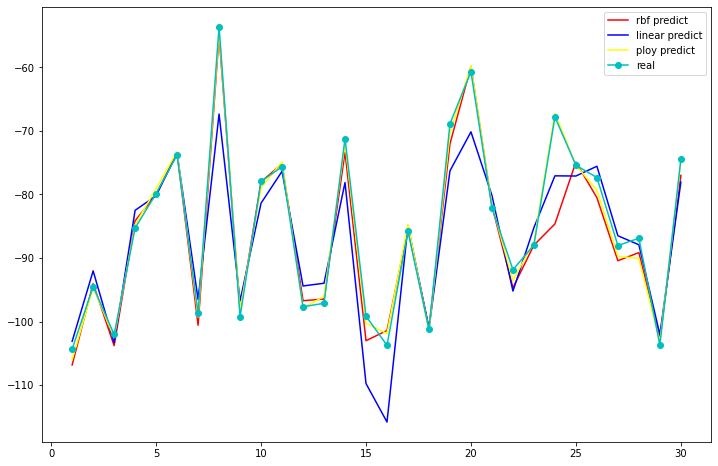

In [14]:
plt.figure(figsize=(12,8))

x_s = np.arange(1,len(x_test) + 1)

plt.plot(x_s, y_rbf,color='red', label="rbf predict")
plt.plot(x_s, y_lin, color='blue',label="linear predict")
plt.plot(x_s, y_poly,color='yellow',label="ploy predict")
plt.plot(x_s, y_test, 'co-', label="real")
plt.legend()

In [15]:
# b) decision  Decision Tree in Regression 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=6).fit(x_train,y_train)

In [16]:
print("The  Decision Tree Regression model training score is ",tree_reg.score(x_train, y_train))

The  Decision Tree Regression model training score is  0.9940232312061408


In [17]:
y_pred_tree = tree_reg.predict(x_test)

Text(0, 0.5, 'Predicted')

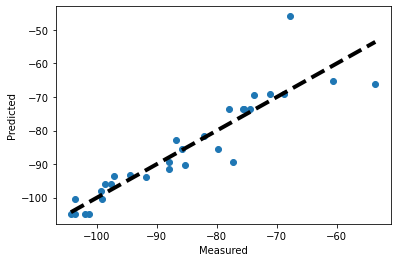

In [18]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_tree)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,  y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_pred_tree))

Mean Absolute Error: 3.7675595517961424
Mean Squared Error: 33.60879047295613
Root Mean Squared Error: 5.797308899218337
Variance score: 0.82(best fit = 1)


In [20]:
# c) Artificial Neural Network
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [21]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10),activation='logistic',solver='adam',max_iter=10000)
mlp.fit(x_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10),
              max_iter=10000)

In [23]:
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

        -111       0.33      1.00      0.50         1
        -106       0.00      0.00      0.00         1
        -105       0.00      0.00      0.00         1
        -103       0.00      0.00      0.00         1
        -102       0.50      1.00      0.67         2
        -101       0.67      1.00      0.80         2
        -100       0.00      0.00      0.00         1
         -99       0.67      0.67      0.67         3
         -98       0.50      1.00      0.67         3
         -97       0.00      0.00      0.00         1
         -96       0.50      0.25      0.33         4
         -95       1.00      0.50      0.67         2
         -94       0.60      0.75      0.67         4
         -93       1.00      1.00      1.00         6
         -91       1.00      1.00      1.00         1
         -90   

Text(0, 0.5, 'Predicted')

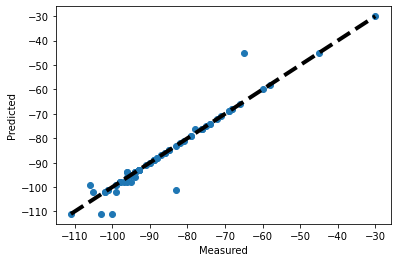

In [26]:
fig, ax = plt.subplots()
ax.scatter(y_train,predict_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [27]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        -104       0.00      0.00      0.00         1
        -103       0.00      0.00      0.00         2
        -102       0.00      0.00      0.00         1
        -101       0.00      0.00      0.00         1
         -99       0.50      0.50      0.50         2
         -98       0.00      0.00      0.00         1
         -97       0.00      0.00      0.00         2
         -96       0.00      0.00      0.00         0
         -94       0.00      0.00      0.00         1
         -91       0.00      0.00      0.00         1
         -90       0.00      0.00      0.00         0
         -89       0.00      0.00      0.00         0
         -88       0.00      0.00      0.00         1
         -87       0.00      0.00      0.00         1
         -86       0.00      0.00      0.00         1
         -85   

Text(0, 0.5, 'Predicted')

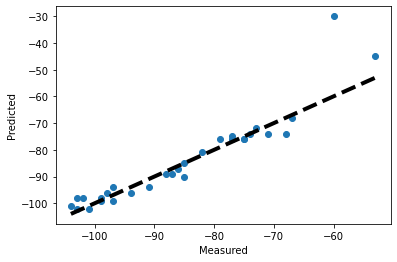

In [28]:
fig, ax = plt.subplots()
ax.scatter(y_test,predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

### Conclusion

WE use SVR, DecisionTree and ANN method for the regression, we can see in this problem, the SVR performs best.